In [ ]:
!pip install scikit-learn scikit-image

Noise Image shape: (512, 512, 3)
Number of Patches : 260100
Shape of patches: (260100, 3, 3, 3)
Shape of Input data : (260100, 27)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


Shape of Output Denoised patches: (260100, 27)
After Reshaping, Output Denoised patches: (260100, 3, 3, 3)


reconstructed_image: (512, 512, 3)


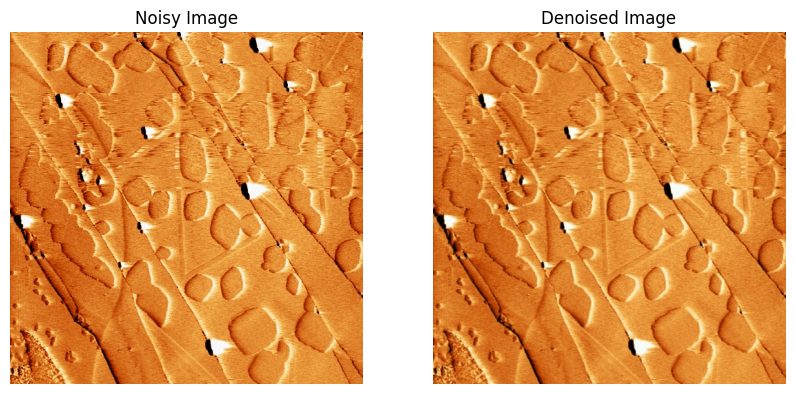

In [ ]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, restoration
from sklearn.feature_extraction import image
from sklearn.decomposition import MiniBatchDictionaryLearning

# Load the noisy image
# Replace with the path to your image file
image_path = '/content/1_amplitude.jpg'
noisy_image = io.imread(image_path)
noisy_image = util.img_as_float(noisy_image)
print('Noise Image shape:',noisy_image.shape)

# Extract small patches from the grayscale image
patch_size = (3, 3)
patches = image.extract_patches_2d(noisy_image, patch_size)
print('Number of Patches :',patches.shape[0])
print('Shape of patches:',patches.shape)
# Reshape the patches for dictionary learning
data = patches.reshape(patches.shape[0], -1)
print('Shape of Input data :',data.shape)

# Perform dictionary learning
n_components = 1000 # Number of dictionary atoms to learn
dl = MiniBatchDictionaryLearning(n_components=n_components,
								alpha=1.0,
								n_iter=500)
# training
dl.fit(data)

# Denoise the patches using the learned dictionary
denoised_patches = np.dot(dl.transform(data), dl.components_)
print('Shape of Output Denoised patches:',denoised_patches.shape)

# Reshape the denoised patches back to their original shape
denoised_patches = denoised_patches.reshape(patches.shape)
print('After Reshaping, Output Denoised patches:',denoised_patches.shape)

# Reconstruct the denoised image from the patches
reconstructed_image = image.reconstruct_from_patches_2d(denoised_patches, noisy_image.shape)
print('reconstructed_image:',reconstructed_image.shape)

# Show the original noisy image and the denoised image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title('Denoised Image')
plt.axis('off')
plt.show()

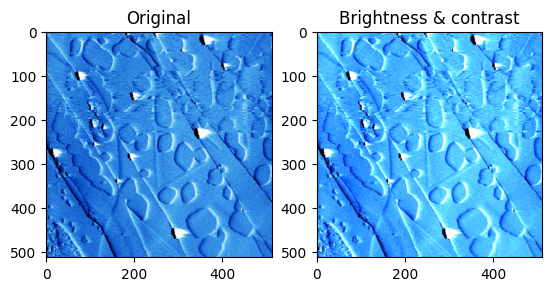

In [ ]:

#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Adjust the brightness and contrast
# Adjusts the brightness by adding 10 to each pixel value
brightness = 10
# Adjusts the contrast by scaling the pixel values by 2.3
contrast = 1.3
image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

#Save the image
cv2.imwrite('modified_image.jpg', image2)
#Plot the contrast image
plt.subplot(1, 2, 2)
plt.title("Brightness & contrast")
plt.imshow(image2)
plt.show()

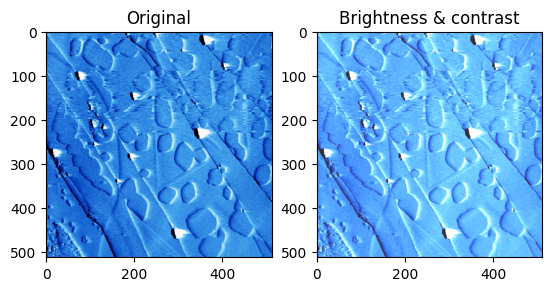

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Adjust the brightness and contrast
# g(i,j)=α⋅f(i,j)+β
# control Contrast by 1.5
alpha = 1.0
# control brightness by 50
beta = 50
image2 = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

#Save the image
cv2.imwrite('Brightness & contrast.jpg', image2)
#Plot the contrast image
plt.subplot(1, 2, 2)
plt.title("Brightness & contrast")
plt.imshow(image2)
plt.show()

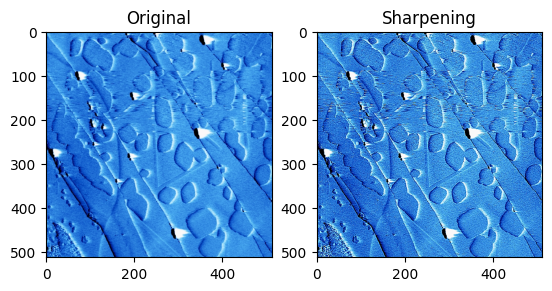

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(image, -1, kernel)

#Save the image
cv2.imwrite('sharpened_image.jpg', sharpened_image)

#Plot the sharpened image
plt.subplot(1, 2, 2)
plt.title("Sharpening")
plt.imshow(sharpened_image)
plt.show()

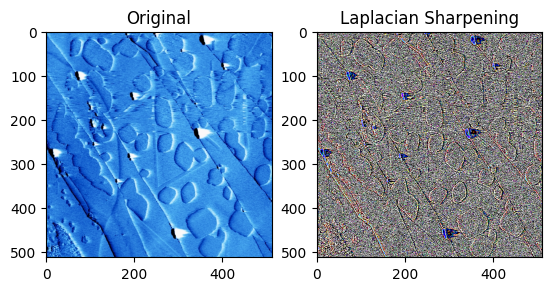

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Sharpen the image using the Laplacian operator
sharpened_image2 = cv2.Laplacian(image, cv2.CV_64F)

#Save the image
cv2.imwrite('Laplacian sharpened_image.jpg', sharpened_image2)

#Plot the sharpened image
plt.subplot(1, 2, 2)
plt.title("Laplacian Sharpening")
plt.imshow(sharpened_image2)
plt.show()


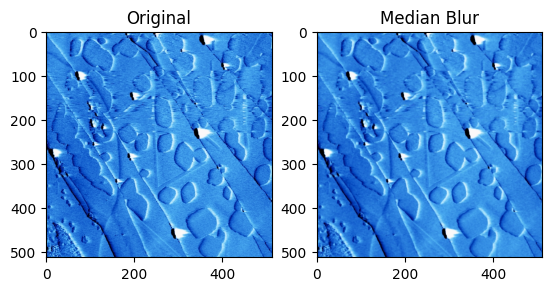

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Remove noise using a median filter
filtered_image = cv2.medianBlur(image, 3)

#Save the image
cv2.imwrite('Median Blur.jpg', filtered_image)

#Plot the blured image
plt.subplot(1, 2, 2)
plt.title("Median Blur")
plt.imshow(filtered_image)
plt.show()

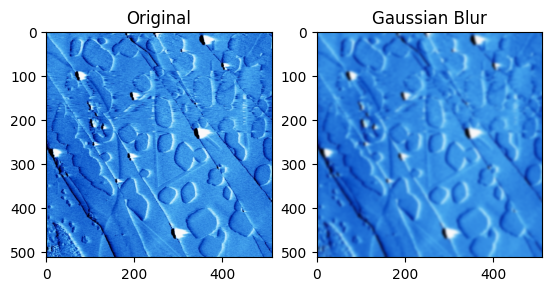

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Remove noise using a Gaussian filter
filtered_image2 = cv2.GaussianBlur(image, (15, 15), 0)

#Save the image
cv2.imwrite('Gaussian Blur.jpg', filtered_image2)

#Plot the blured image
plt.subplot(1, 2, 2)
plt.title("Gaussian Blur")
plt.imshow(filtered_image2)
plt.show()

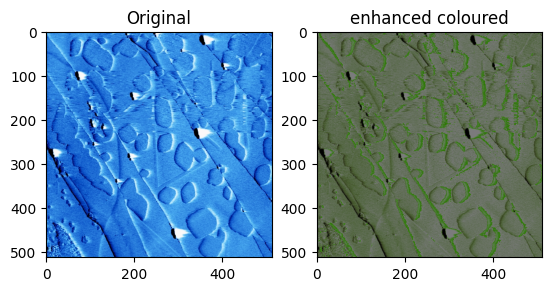

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Convert the image from BGR to HSV color space
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Adjust the hue, saturation, and value of the image
# Adjusts the hue by multiplying it by 0.7
image[:, :, 0] = image[:, :, 0] * 0.7
# Adjusts the saturation by multiplying it by 1.5
image[:, :, 1] = image[:, :, 1] * 1.5
# Adjusts the value by multiplying it by 0.5
image[:, :, 2] = image[:, :, 2] * 0.5

# Convert the image back to BGR color space
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)

#Save the image
cv2.imwrite('enhanced coloured.jpg', image2)

#Plot the enhanced image
plt.subplot(1, 2, 2)
plt.title("enhanced coloured")
plt.imshow(image2)
plt.show()

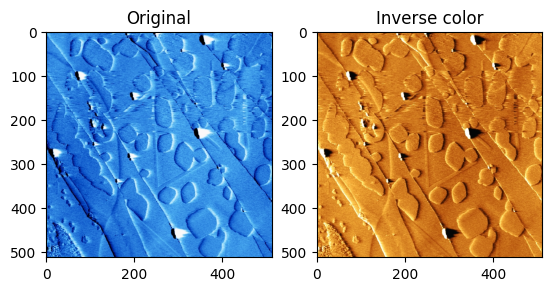

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/1_amplitude.jpg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Inverse by subtracting from 255
inverse_image = 255 - image

#Save the image
cv2.imwrite('inverse_image.jpg', inverse_image)
#Plot the Inverse image
plt.subplot(1, 2, 2)
plt.title("Inverse color")
plt.imshow(inverse_image)
plt.show()